In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Question 1
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

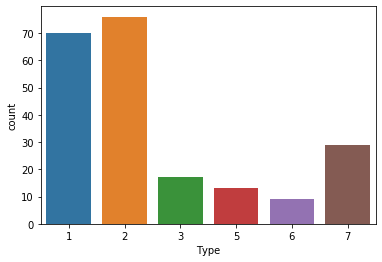

In [4]:
sns.countplot(df["Type"])

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV
from sklearn import metrics

In [6]:
#Question 2
x = df.iloc[:,0:9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [7]:
y = df["Type"]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [8]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 10, test_size = 0.20)


In [10]:
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
prediction = dt.predict(test_x)
prediction

array([1, 2, 5, 2, 1, 6, 2, 5, 1, 3, 1, 5, 3, 7, 1, 2, 6, 2, 3, 2, 3, 2,
       6, 1, 2, 5, 2, 1, 1, 5, 1, 2, 2, 6, 2, 7, 2, 7, 2, 1, 1, 2, 1])

In [13]:
mes = metrics.mean_squared_error(prediction, test_y)
mes


2.558139534883721

In [14]:
print(metrics.accuracy_score(prediction, test_y))


0.6046511627906976


In [15]:
#Question 3
kf = KFold(n_splits=3)


In [16]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt.fit(x_train, y_train)
    prediction = dt.predict(x_test)
    print("Accuracy Score : " + str(metrics.accuracy_score(prediction[0:], y_test.values)))

Accuracy Score : 0.013888888888888888
Accuracy Score : 0.15492957746478872
Accuracy Score : 0.014084507042253521


In [17]:
print(cross_val_score(dt, x, y, cv = 3, scoring="accuracy").mean())


0.5959673696967023


In [19]:
#Question 4
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

parameter_candidates = [{1},{2}]

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
print(CV_rfc.best_params_)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 'auto', 'n_estimators': 200}


In [21]:
rf = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=200, oob_score = True)
cross_val_score(rf, x, y, cv=10, scoring='accuracy')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.65217391, 0.7826087 , 0.7826087 , 0.68181818, 0.54545455,
       0.86363636, 0.85714286, 0.4       , 0.85      , 0.83333333])